In [115]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.youtube.com/watch?v=pnUEtA3ytgY&t=1801s

In [116]:
df = pd.read_csv("../data/train.csv")
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [117]:
# #Exploring Data
# target_feature = "cost"

In [118]:
#defining numerical & categorical columns
numarical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]

# lets print the columns
print("The {} numerical features with dataset: {}".format(len(numarical_features),numarical_features))
print("\nThe {} categorical features with dataset: {}".format(len(categorical_features), categorical_features))

The 7 numerical features with dataset: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

The 13 categorical features with dataset: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


### Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix "uni" means `one`. The purpose of univariate analysis is to understand the distribution of values for a single variable 

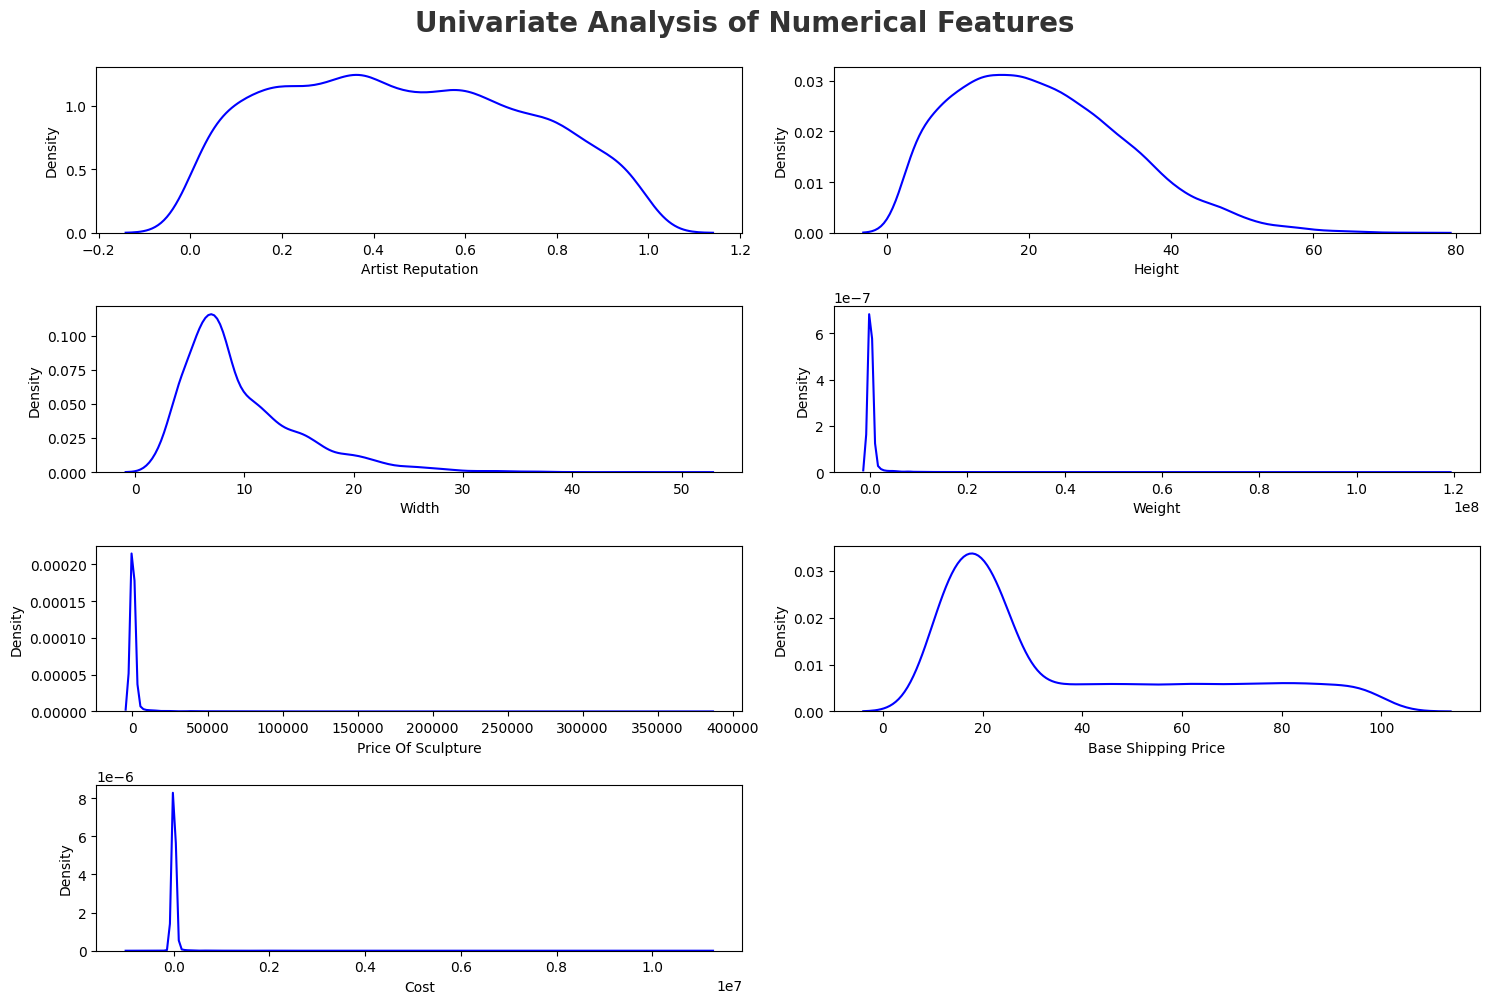

In [119]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1)

for i in range(0, len(numarical_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numarical_features[i]], color='blue')
    plt.xlabel(numarical_features[i])
    plt.tight_layout();  


**Report summary**:
* As per above report we can see all of the features are left skewed except `Artist Reputations` it is normal ddistributed.


# Categorical Features

In [120]:
categorical_col = []
for i in categorical_features:
    print(f"{i}: {len(df[i].unique())}")
    if len(df[i].unique()) < 10:
        categorical_col.append(i)

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


* Customer Id, Artist Name, Customer location have 6500 unique values, so they can be dropped.
* Scheduled date and Delivery date needs feature engineering

In [121]:
categorical_col

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

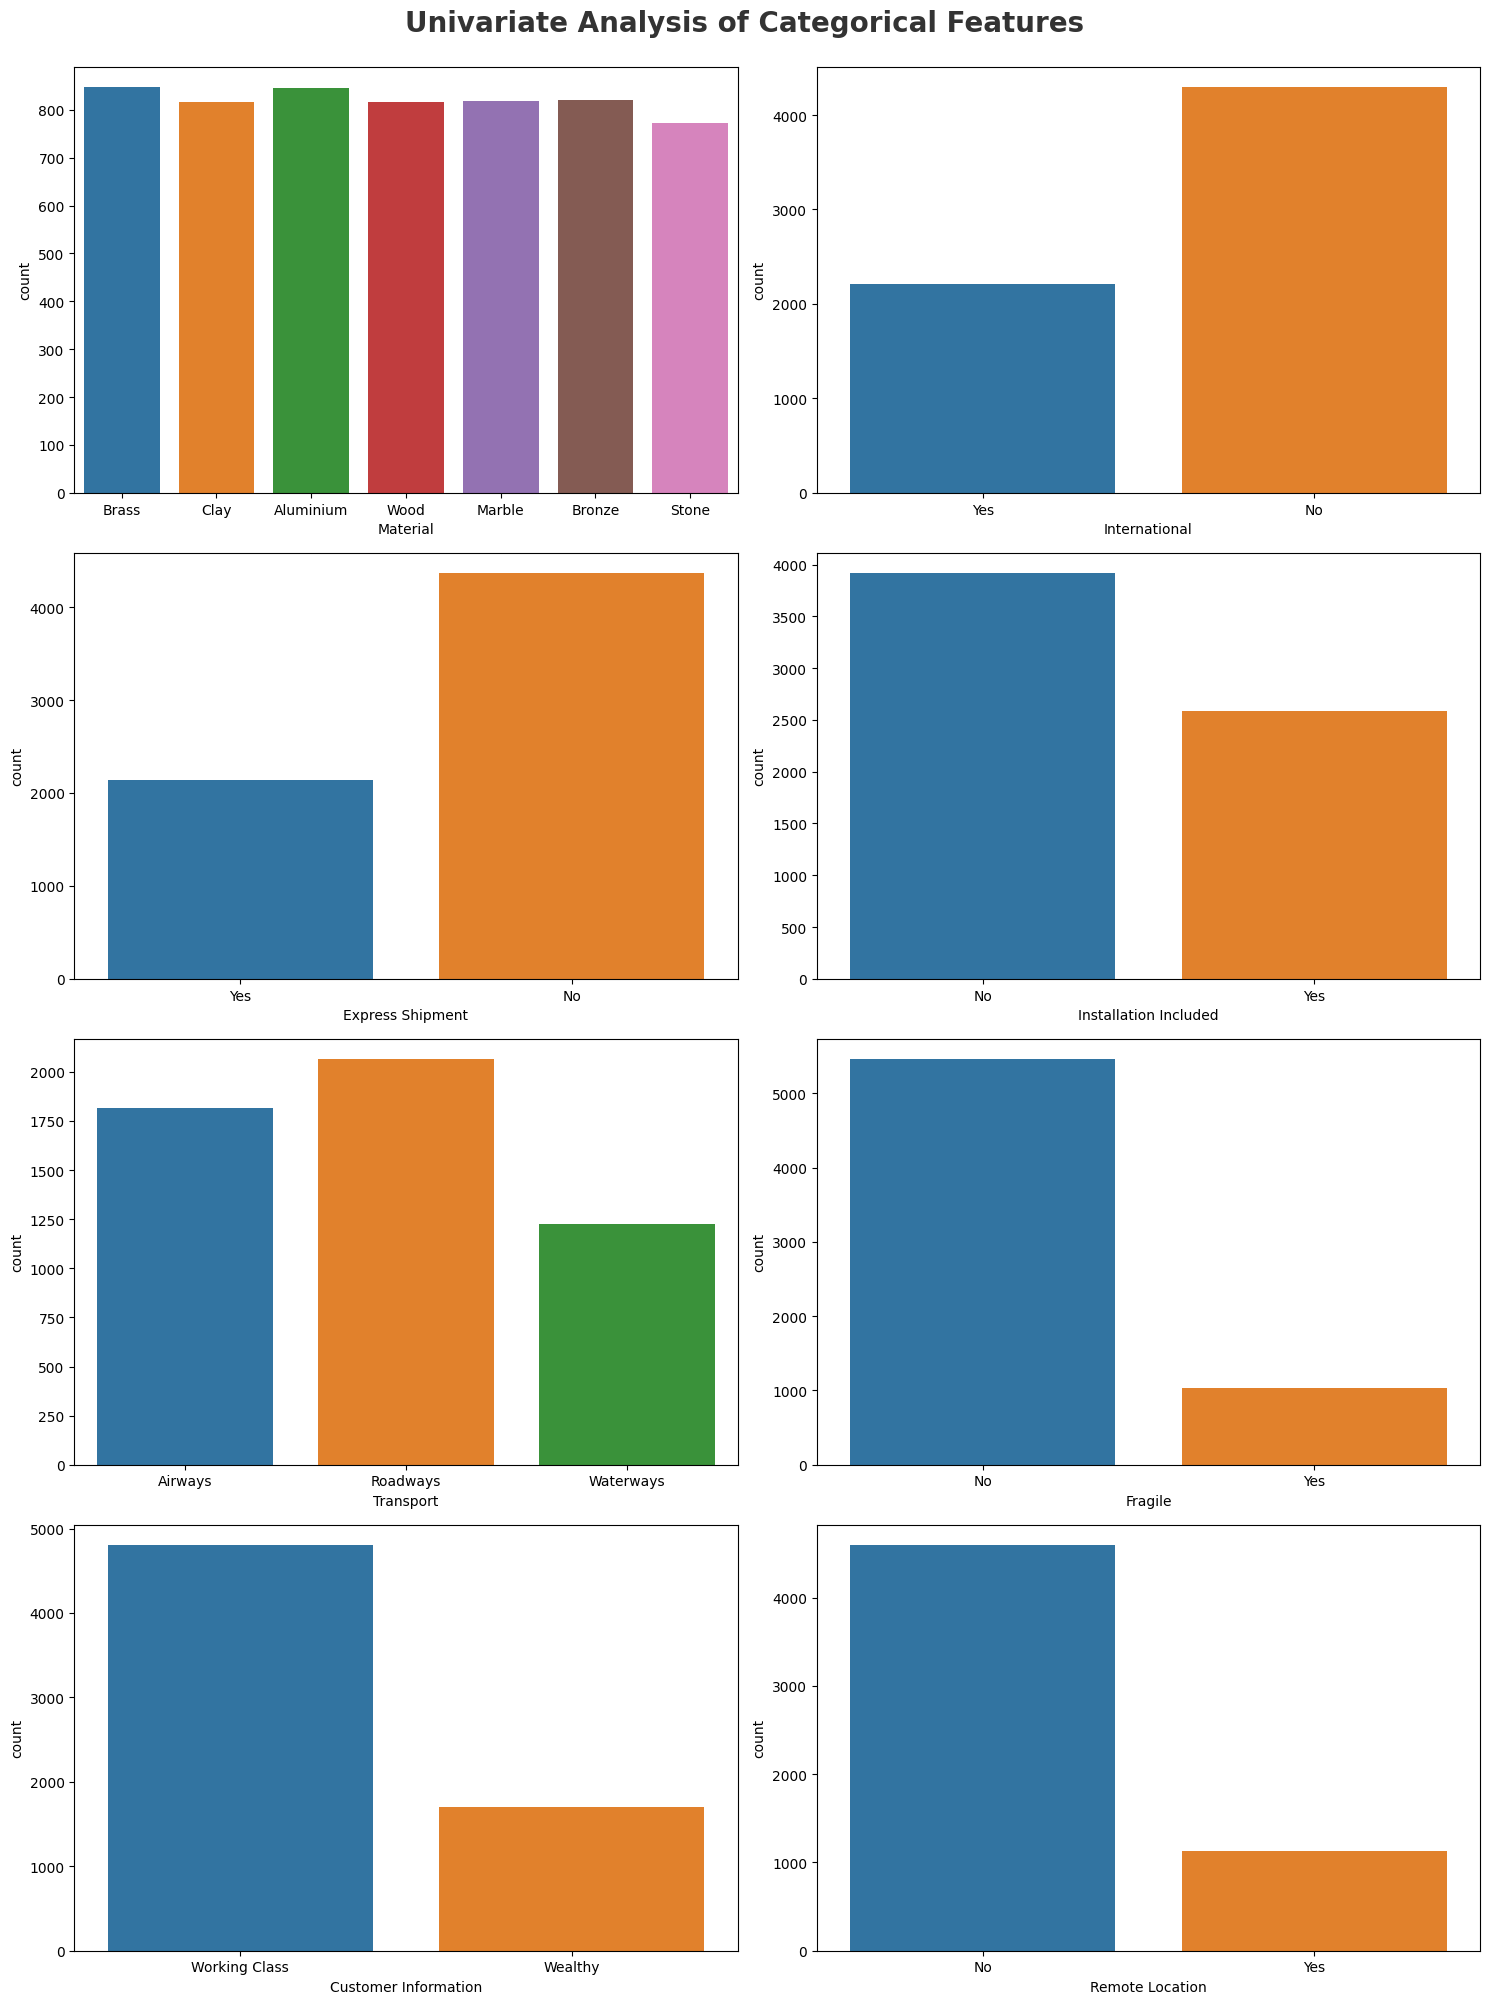

In [122]:
# Univariate Analysis on Categorical data
plt.figure(figsize=(15, 20))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1)

for i in range(0, len(categorical_col)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[categorical_col[i]])
    plt.xlabel(categorical_col[i])
    plt.tight_layout();  


**Categorical Stats:**
* The categories are not with high cardinality, the Material column has only seventh unique values and those are equally distributed.

In [123]:
df.isnull().mean()

Customer Id              0.000000
Artist Name              0.000000
Artist Reputation        0.115385
Height                   0.057692
Width                    0.089846
Weight                   0.090308
Material                 0.117538
Price Of Sculpture       0.000000
Base Shipping Price      0.000000
International            0.000000
Express Shipment         0.000000
Installation Included    0.000000
Transport                0.214154
Fragile                  0.000000
Customer Information     0.000000
Remote Location          0.118615
Scheduled Date           0.000000
Delivery Date            0.000000
Customer Location        0.000000
Cost                     0.000000
dtype: float64

### Multivariate Analysis
* Multivariate Analysis is the analysis of more than one variable

#### Checking the Correlation in Numerical Features

In [124]:
df[(list(df.columns)[1:])].corr()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


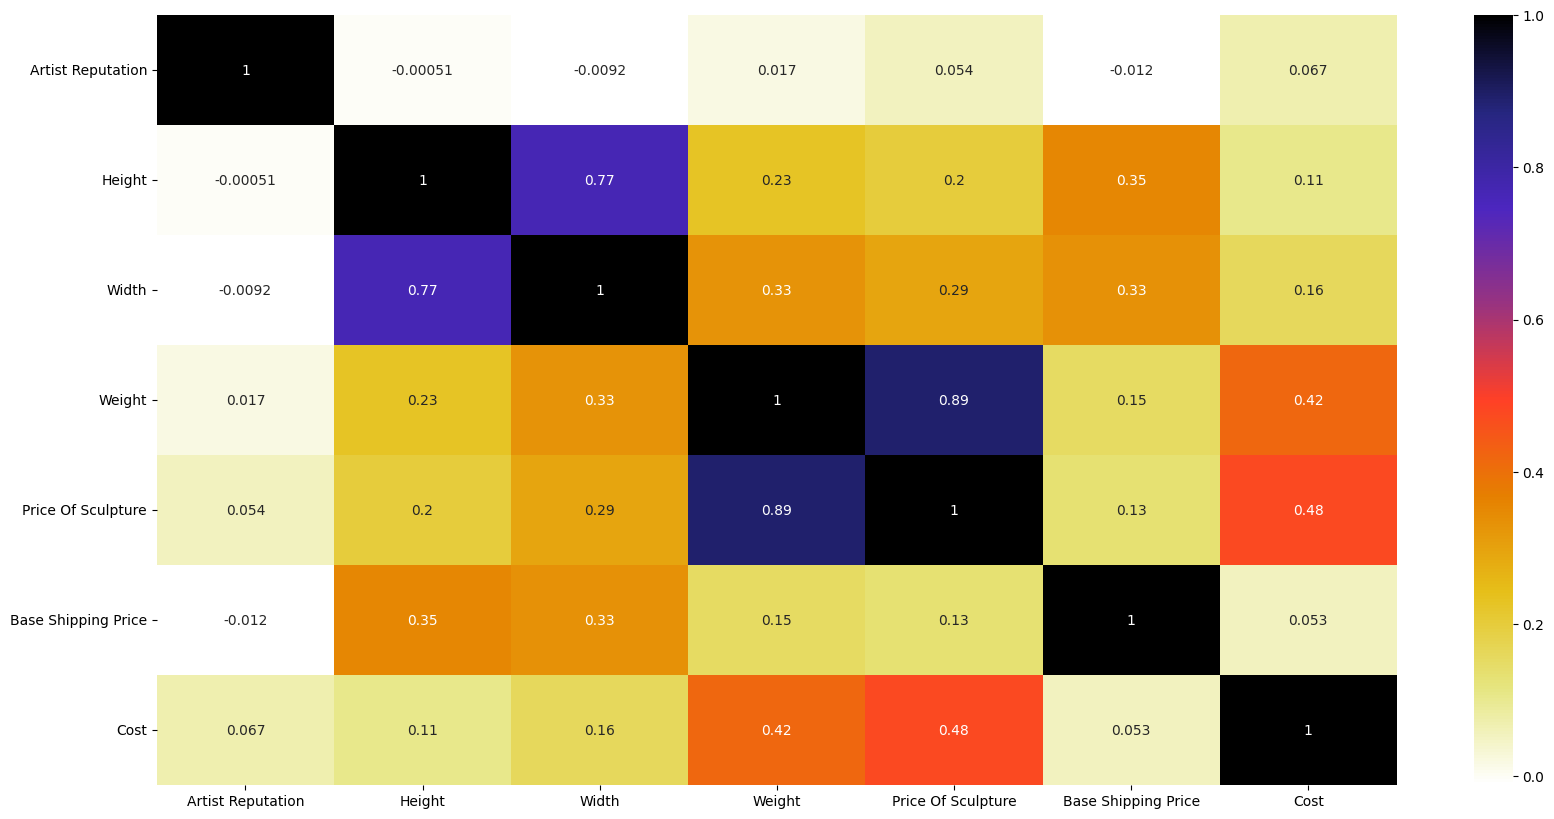

In [125]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
plt.show()

### Relationship between target and numerical columns

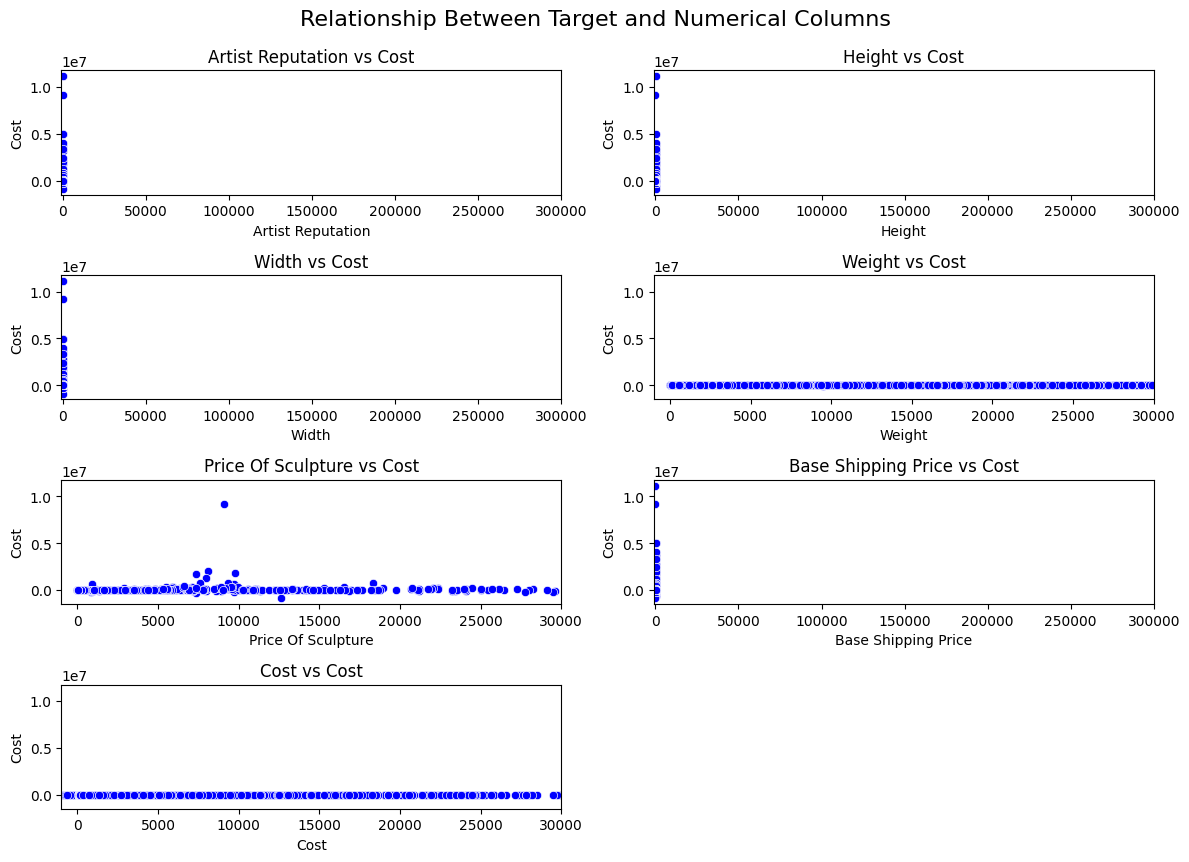

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))  # Adjust figure size as needed

for i in range(len(numarical_features)):
    plt.subplot(6, 2, i+1)
    sns.scatterplot(data=df, x=numarical_features[i], y=df['Cost'], color='b')
    
    # Example of setting x-axis limit based on the maximum value
    if df[numarical_features[i]].max() > 30000:
        plt.xlim(-1000, 30000)
    elif df[numarical_features[i]].max() > 300000:
        plt.xlim(-1000, 300000)
    else:
        plt.xlim(-1000, 300000)
    
    plt.xlabel(numarical_features[i])
    plt.ylabel(target_feature)
    plt.title(f'{numarical_features[i]} vs {target_feature}')

plt.tight_layout()
plt.suptitle('Relationship Between Target and Numerical Columns', y=1.02, fontsize=16)
plt.show()


**Stats**:

* We can observe that there seems to be very low linear relationship between the independent and dependent features.
* There seems to be linear relationships between Price of sculpture and the target colums

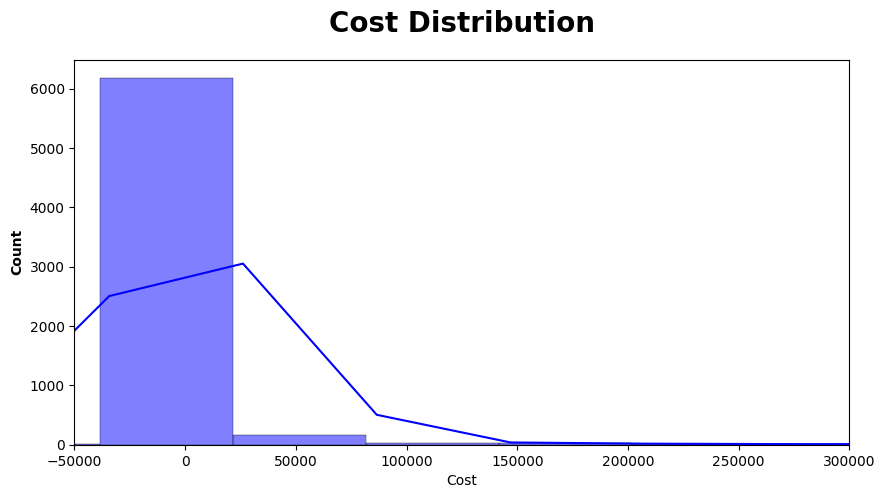

In [127]:
# Visualizing independent columns
# Cost (Target feature)
plt.subplots(figsize=(10, 5))
sns.histplot(df["Cost"], bins=200, kde=True, color="b")
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlim(-50000, 300000)
plt.show()

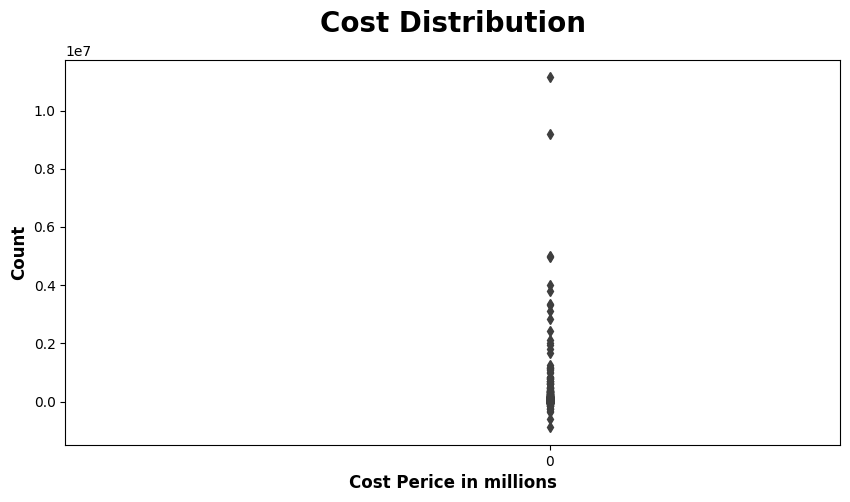

In [128]:
plt.subplots(figsize=(10,5))
sns.boxplot(df["Cost"])
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost Perice in millions", weight="bold", fontsize=12)
plt.xlim(-50000, 30000)
plt.show()

**Insights**

* There are outliers in the target feature and we need to transform

### How shipment type is affecting cost of shipment?

In [129]:
target_feature = "Cost"

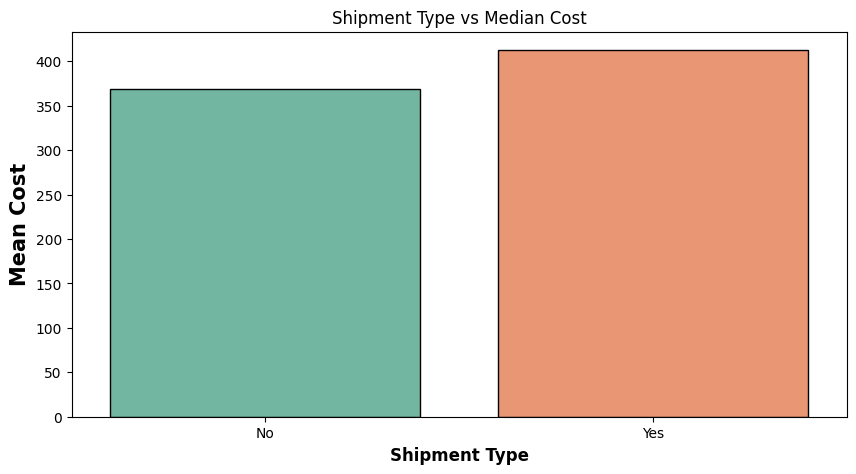

In [130]:

international = df.groupby("International")[target_feature].median()
international.to_frame()

plt.subplots(figsize=(10,5))
sns.barplot(x=international.index, y=international.values, ec="black", palette="Set2")
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Shipment Type", weight="bold", fontsize=12)
plt.title("Shipment Type vs Median Cost")
plt.show()

In [131]:
international_shipment_median = df[df['International']=="Yes"]["Cost"].median()
domestic_shipment_median = df[df["International"]=="No"]["Cost"].median()
print(f"The difference between the median shipment price of international and domestic is: ", {international_shipment_median-domestic_shipment_median})

The difference between the median shipment price of international and domestic is:  {43.91500000000008}


**Stats Inference:**
* There is only a diffrence of 43% in the shipping cost between international and domestic, so it won't iimpact prediction.
* We can see the more domestic shipement than international.


In [132]:
express_shipment_median = df[df["Express Shipment"]=="Yes"]["Cost"].median()
normal_shipment_median = df[df["Express Shipment"]=="No"]["Cost"].median()
print(f"The median difference between shipment price of express shipment and normal shipment: ", {express_shipment_median-normal_shipment_median})

The median difference between shipment price of express shipment and normal shipment:  {83.08000000000004}


**Stats Inference:**
* In express shipment also, there is only a diffrence of 83 in the shipping cost between international and domestic, os it wont affect the much at the prediction.
* It's obvious that there are more normal delivery than express

### How Installation included or not is affecting cost of shipment?

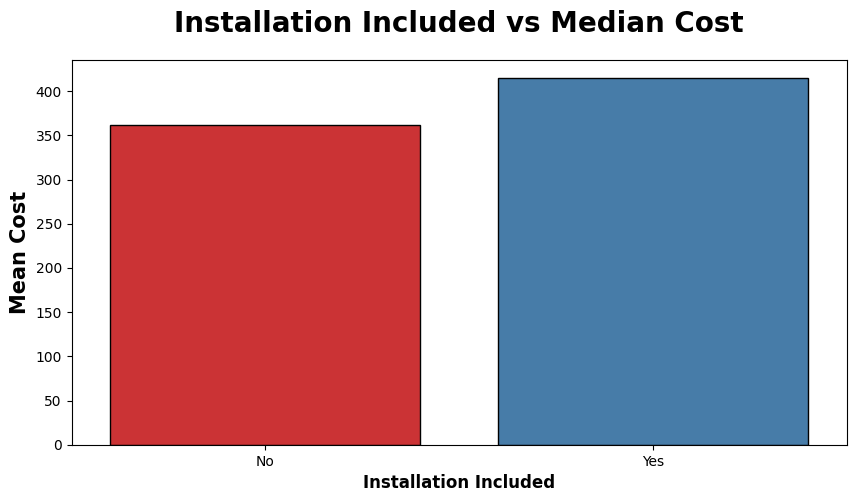

In [133]:
installation = df.groupby("Installation Included")[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(10,5))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.title("Installation Included vs Median Cost", weight="bold", fontsize=20, pad=20)
plt.show()

In [134]:
installation_needed_median = df[df["Installation Included"]=="Yes"]["Cost"].median()
installation_not_needed_median = df[df["Installation Included"]== "No"]["Cost"].median()
print(f"The differene between the median shipment of installation included and not:", {installation_needed_median-installation_not_needed_median})

The differene between the median shipment of installation included and not: {53.67500000000001}


**Stats:**
* There is only difference of 53 which won't make much a difference at the time of prediction
* We can see that the charges for not installation is less and values are more which says that a business should try to take contract wich requires installation.

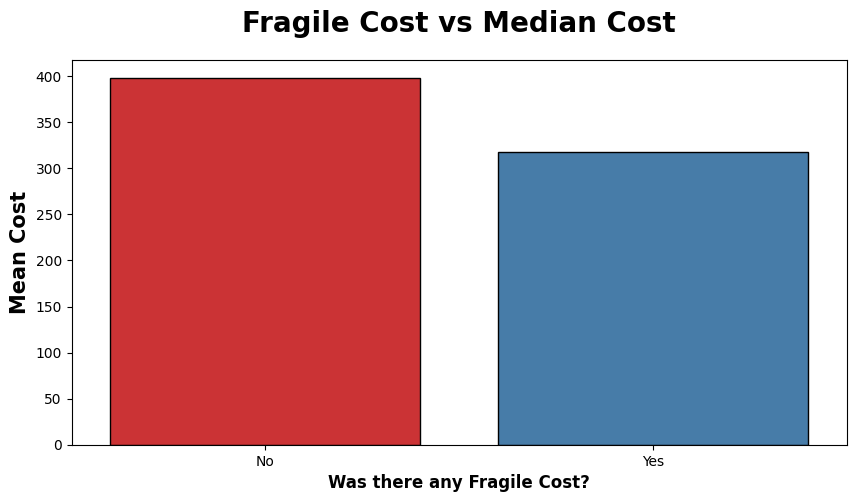

In [135]:
fragile = df.groupby("Fragile")[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(10,5))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.title("Fragile Cost vs Median Cost", weight="bold", fontsize=20, pad=20)
plt.show()

In [136]:
fragile_median = df[df["Fragile"]=="Yes"]["Cost"].median()
fragile_Not_median = df[df["Fragile"]=="No"]["Cost"].median()

print(f"the difference between median shipment price of fragile cost and no-fragile cost {fragile_median-fragile_Not_median} ")

the difference between median shipment price of fragile cost and no-fragile cost -80.03000000000003 


**Stats:**
* there is only diffrence of -80% which says that the median cost is more if there is no-fragile cost is only 20% and becouse the number is samll it wont make much chaange of prediction
    

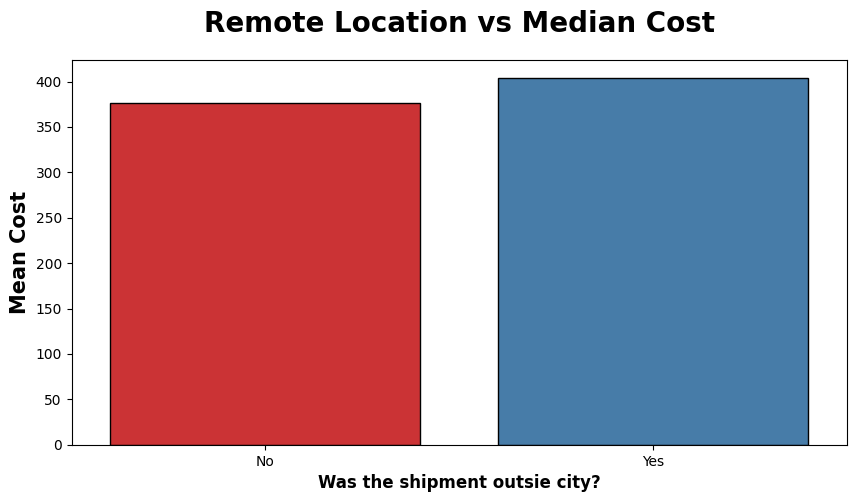

In [137]:
remote = df.groupby("Remote Location")[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(10,5))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set1")
plt.xlabel("Was the shipment outsie city?", weight="bold", fontsize=12)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.title("Remote Location vs Median Cost", weight="bold", fontsize=20, pad=20)
plt.show()

In [138]:
remote_median = df[df["Remote Location"]=="Yes"]["Cost"].median()
remote_Not_median = df[df["Remote Location"]=="No"]["Cost"].median()

print(f"the difference between median shipment price of fragile cost and no-fragile cost {remote_median-remote_Not_median} ")

the difference between median shipment price of fragile cost and no-fragile cost 27.714999999999975 


The difference is low so as usal it won't make any different on prediction, this also indicate its almot balanced 

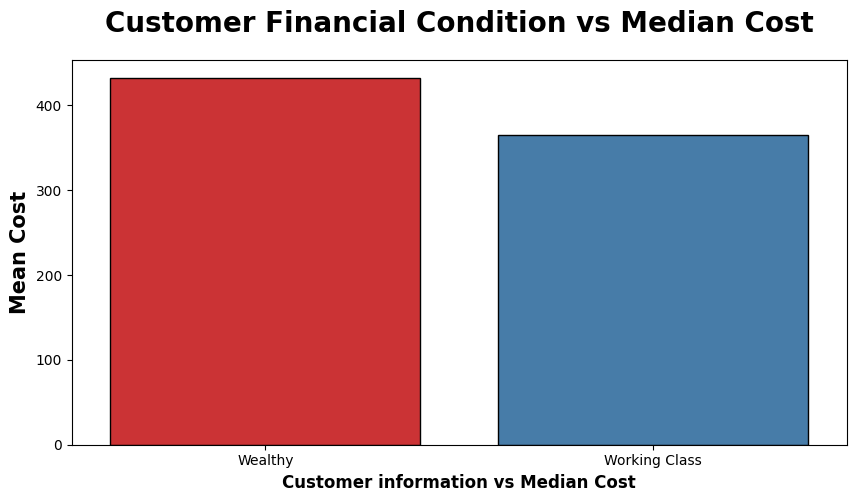

In [139]:
cust_info = df.groupby("Customer Information")[target_feature].median()
cust_info.to_frame()

plt.subplots(figsize=(10,5))
sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set1")
plt.xlabel("Customer information vs Median Cost", weight="bold", fontsize=12)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.title("Customer Financial Condition vs Median Cost", weight="bold", fontsize=20, pad=20)
plt.show()

In [140]:
customer_wealty_median = df[df["Customer Information"]=="Wealthy"]["Cost"].median()
customer_working_Class_median = df[df["Customer Information"]=="Working Class"]["Cost"].median()

print(f"the difference between median shipment price of fragile cost and no-fragile cost {customer_wealty_median-customer_working_Class_median}")

the difference between median shipment price of fragile cost and no-fragile cost 66.94


The of only 13 between customer wealth and working class, the cust info feature distribution well good

# Visualizing the dates features

In [141]:
df["Scheduled Date"] = pd.to_datetime(df["Scheduled Date"])
df["Delivery Date"] = pd.to_datetime(df["Delivery Date"])

df["year"] = pd.DatetimeIndex(df["Scheduled Date"]).year
df["month"] = pd.DatetimeIndex(df["Scheduled Date"]).month

In [142]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741


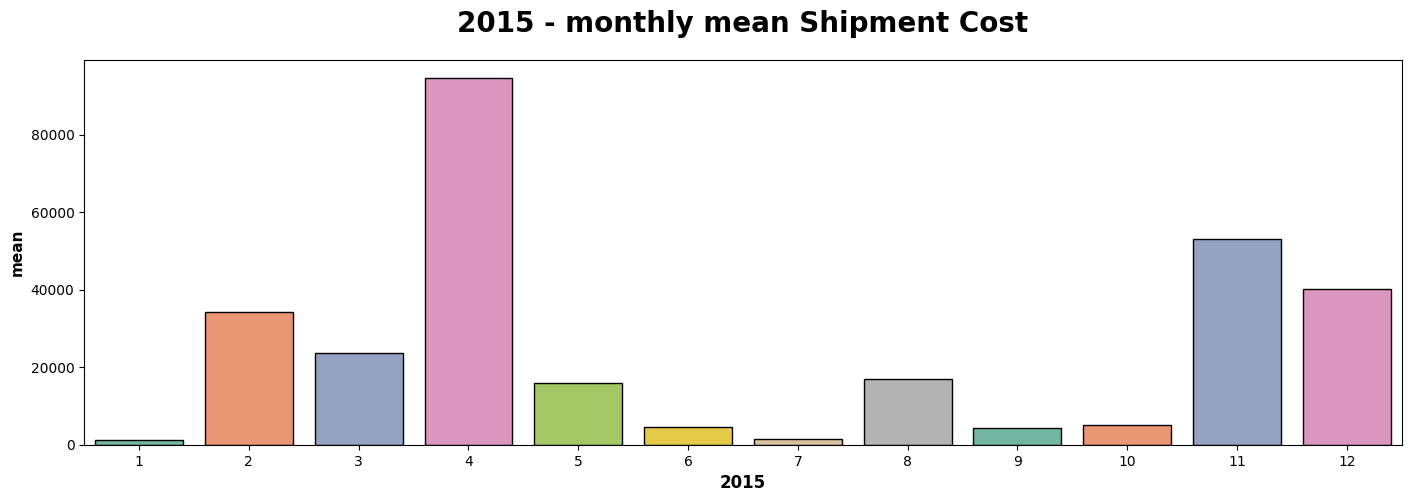

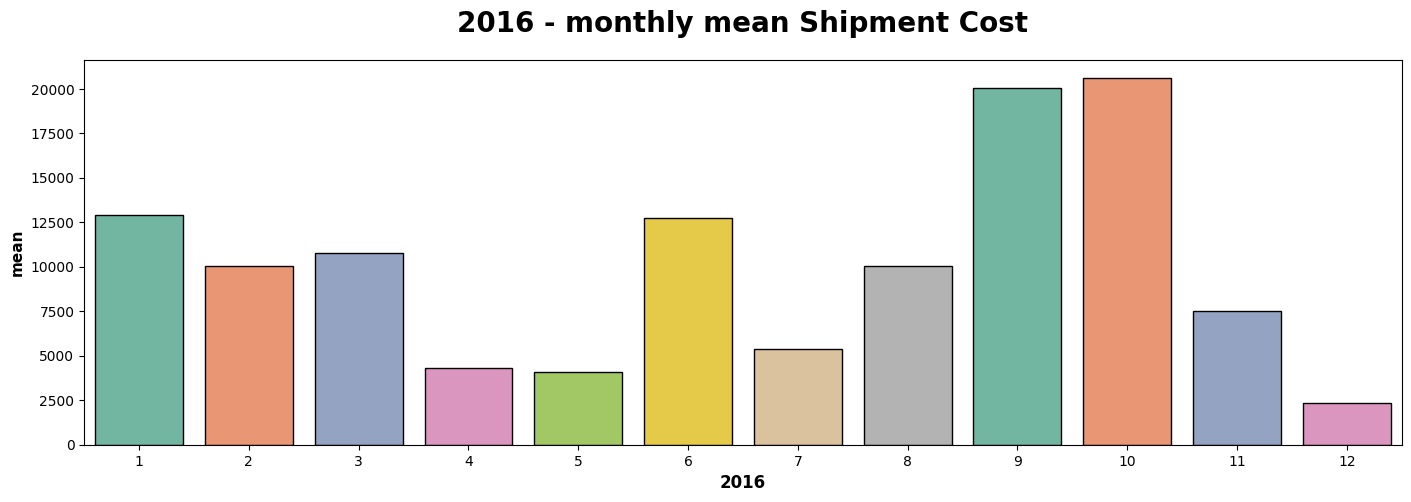

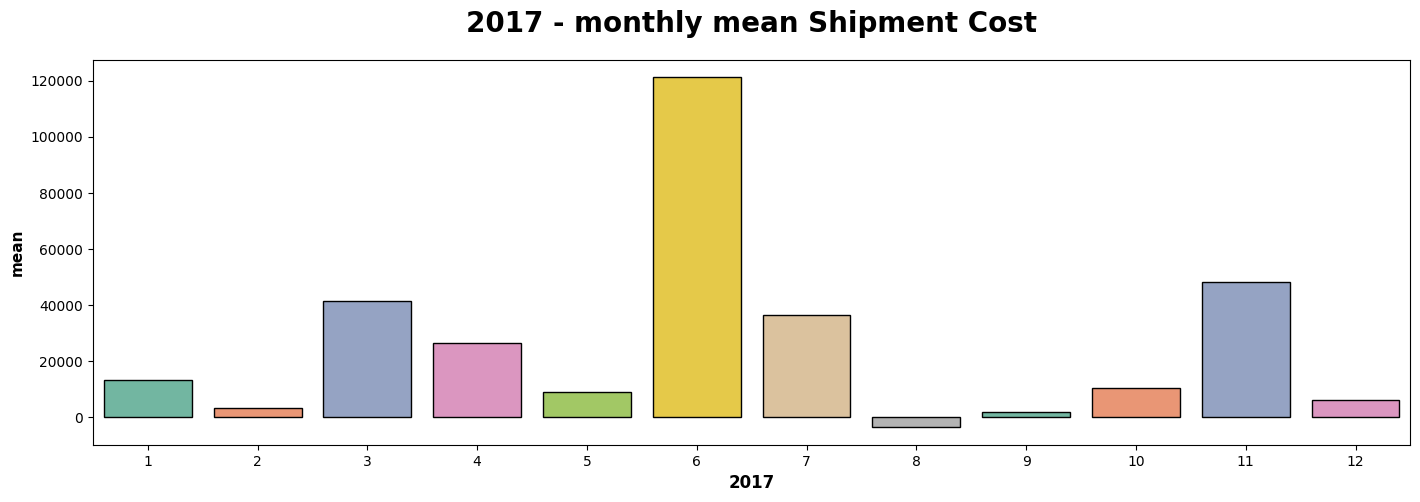

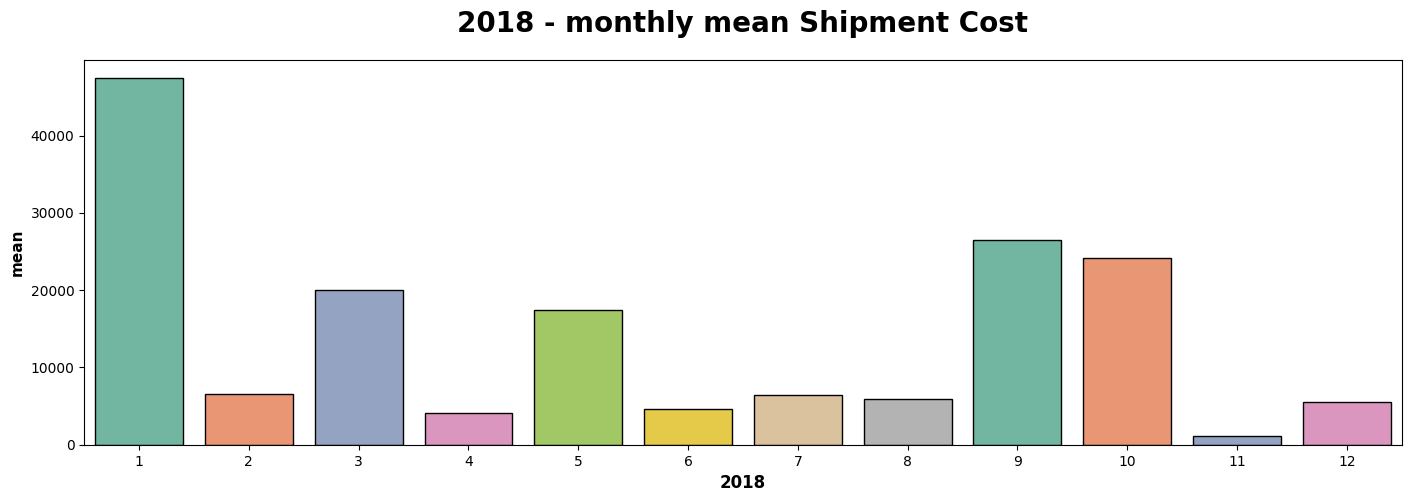

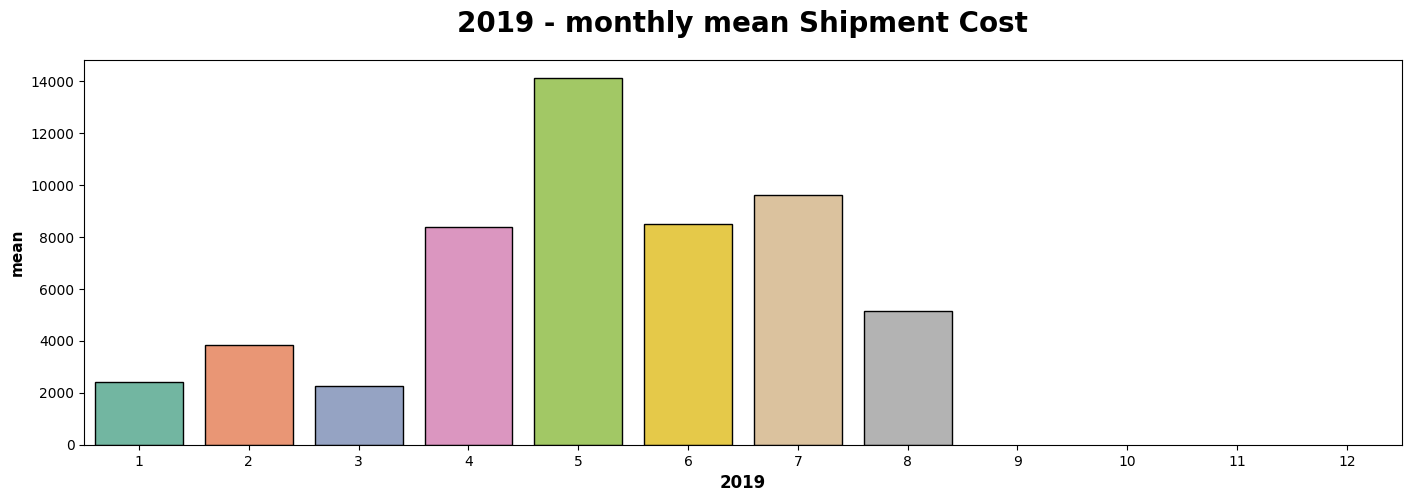

In [143]:
for i in df_wide.columns:
    plt.subplots(figsize=(17,5))
    sns.barplot(x=df_wide.index, y=df_wide[i], ec = "black", palette="Set2")
    plt.title(str(i) + " - monthly mean Shipment Cost", weight="bold", fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()
    

**Inferences:**
* Monthly distribution of every year is different.
* The mosthly cost spend on starting and end of the years in 2015, 2016 and 2018.
* The spended high cost in mid year for CY 2017 and 2019

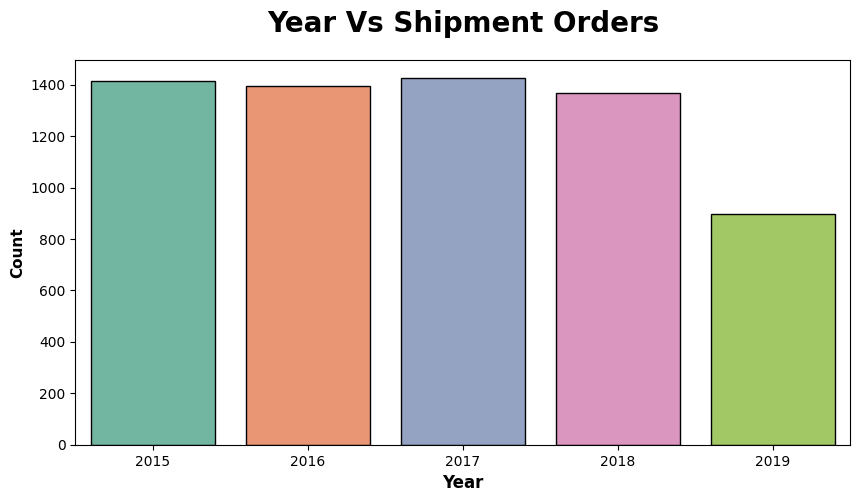

In [144]:
plt.subplots(figsize=(10, 5))
sns.countplot(x=df.year, ec = "black", palette="Set2")
plt.title("Year Vs Shipment Orders", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

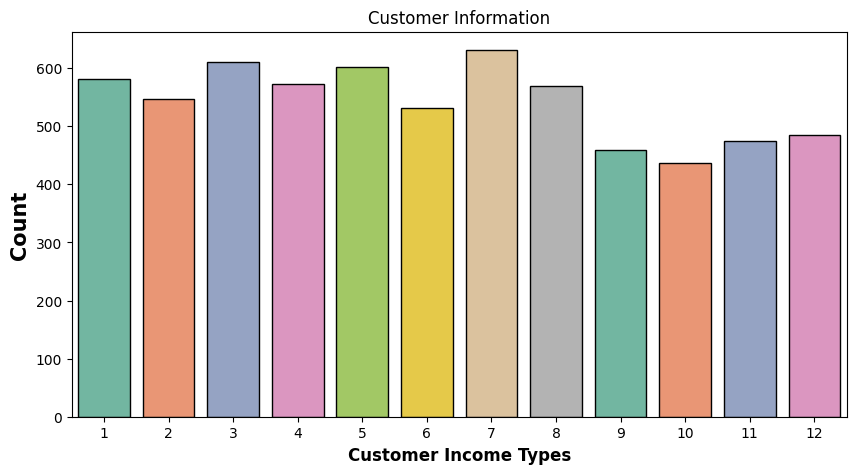

In [145]:
plt.subplots(figsize=(10, 5))
sns.countplot(x=df.month, ec = "black", palette="Set2")
plt.title("Customer Information")
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Customer Income Types", weight="bold", fontsize=12)
plt.show()

### Final Report

* The Cost column is the target to predict and it is with continues values.
* There are outliers in some columns we have to remove outliers
* Date columns has been extracted in `year` and `month`.

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)